In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

ABS_path = "Data/ABS_C16_G43_LGA_16072020215258010.csv"
ABS_metadata = pd.read_csv(ABS_path, low_memory = False)
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value,Flag Codes,Flags
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,236.0,NaN,NaN
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,113.0,NaN,NaN
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,348.0,NaN,NaN
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,105.0,NaN,NaN
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,58.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay (C),2016.0,2016.0,32.0,NaN,NaN
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale (S),2016.0,2016.0,45.0,NaN,NaN
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori (S),2016.0,2016.0,0.0,NaN,NaN
158548,T75,75 - 84,1,Males,LF,Total Labour Force,1,New South Wales,LGA2016,Local Government Areas (2016),12930,Georges River (A),2016.0,2016.0,167.0,NaN,NaN


In [64]:
#Remove Flag Code and Flags Colums
ABS_metadata = ABS_metadata.drop(['Flag Codes', 'Flags'], axis=1)
#Remove NaN rows
ABS_metadata = ABS_metadata.dropna()

In [65]:
#State just WA


In [66]:
ABS_WA_data = ABS_metadata.set_index('STATE')

In [67]:
ABS_WA_data = ABS_WA_data.drop([1,2,3,4,6,7,8,9], inplace=False)

In [68]:
ABS_WA_data = ABS_WA_data.reset_index()

In [107]:
ABS_WA_data

,STATE,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany (C),2016.0,2016.0,204.0
1,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany (C),2016.0,2016.0,101.0
2,5,A15,15 - 19,3,Persons,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany (C),2016.0,2016.0,302.0
3,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale (C),2016.0,2016.0,280.0
4,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale (C),2016.0,2016.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39207,5,T65,65 - 74,1,Males,4,"Employed, hours of work not stated",Western Australia,LGA2016,Local Government Areas (2016),53640,Gnowangerup (S),2016.0,2016.0,0.0
39208,5,T75,75 - 84,2,Females,UEMP,Total Unemployed,Western Australia,LGA2016,Local Government Areas (2016),52310,Cuballing (S),2016.0,2016.0,0.0
39209,5,T65,65 - 74,2,Females,6,"Unemployed, looking for part-time work",Western Australia,LGA2016,Local Government Areas (2016),57080,Perth (C),2016.0,2016.0,5.0
39210,5,T55,55 - 64,1,Males,LF,Total Labour Force,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning (S),2016.0,2016.0,22.0


In [111]:
LFS_WA_Data_count = ABS_WA_data.groupby("Labour force status").sum()
LFS_WA_Data_count

,STATE,SEX_ABS,TIME,Census year,Value
Labour force status,,,,,
"Employed, away from work",16400,6559,6612480.0,6612480.0,156565.0
"Employed, hours of work not stated",16430,6567,6624576.0,6624576.0,68463.0
"Employed, worked full-time",16320,6530,6580224.0,6580224.0,2412684.0
"Employed, worked part-time",16235,6489,6545952.0,6545952.0,1328181.0
Labour force status not stated,16315,6529,6578208.0,6578208.0,507855.0
Not in the labour force,16250,6513,6552000.0,6552000.0,2045654.0
Total,16335,6530,6586272.0,6586272.0,6927326.0
Total Employed,16270,6530,6560064.0,6560064.0,4019955.0
Total Labour Force,16380,6550,6604416.0,6604416.0,4398171.0


In [109]:
LFS_WA_Data_count = LFS_WA_Data_count.drop(['STATE', 'SEX_ABS','TIME',"Census year"], axis=1)

In [110]:
LFS_WA_Data_count = LFS_WA_Data_count.drop(['Total', 'Total Employed', 'Total Unemployed', 'Total Labour Force', 'Not in the labour force','Labour force status not stated',''], inplace=False)

KeyError: "['labour force status not stated'] not found in axis"

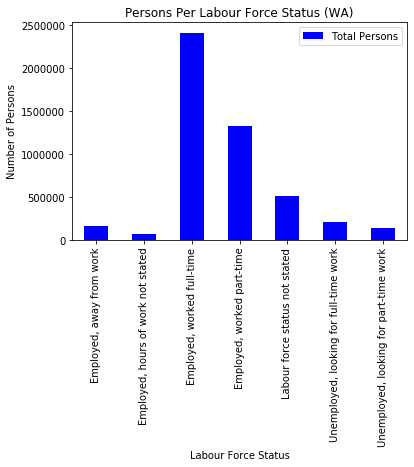

In [102]:
LFS_WA_Data_count = LFS_WA_Data_count.rename(columns = {"Value":"Total Persons"})
LFS_WA_Data_count_plot  = LFS_WA_Data_count.plot(kind="bar",facecolor="blue")
plt.title("Persons Per Labour Force Status (WA)")
#plt.ylim(0,30)
plt.xlabel("Labour Force Status")
plt.ylabel("Number of Persons")
#plt.tight_layout()
LFS_WA_Data_count_plot;